## 0. Preperation

- Install latest version of SAHI and Torchvision:

In [ ]:
!pip install git+https://github.com/kadirnar/sahi.git@torchvision

  Cloning https://github.com/kadirnar/sahi.git (to revision torchvision) to /tmp/pip-req-build-n8lo5kmh
  Running command git clone -q https://github.com/kadirnar/sahi.git /tmp/pip-req-build-n8lo5kmh
  Running command git checkout -b torchvision --track origin/torchvision
  Switched to a new branch 'torchvision'
  Branch 'torchvision' set up to track remote branch 'torchvision' from 'origin'.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 97 kB 2.7 MB/s 
     |████████████████████████████████| 87 kB 6.1 MB/s 
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
     |████████████████████████████████| 3.1 MB 19.1 MB/s 
  Created wheel for sahi: filename=sahi-0.9.0-py3-none-any.whl size=81475 sha256=a1a74a7a5299f6a62eda413abbc1445fec0d35d2f91a0147dabf0d0296c5f68a
  Stored in directory: /tmp/pip-ephem-wheel-cache-iura8c0_/wheels/ea/2f/9e/d81f5636532fc922291706942d8cd

In [ ]:
!pip install torchvision

In [ ]:
import os
os.getcwd()

'/content'

- Import required modules:

In [ ]:
# will be used for torchvision fasterrcnn model zoo name
from sahi.utils.torchvision import TorchVisionTestConstants, download_torchvision_model

# import required functions, classes
from sahi.model import TorchVisionDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
# set torchvision fasterrcnn model and config zoo name
download_torchvision_model()
model_path = TorchVisionTestConstants.FASTERCNN_MODEL_PATH,
config_path = TorchVisionTestConstants.FASTERCNN_CONFIG_ZOO_NAME,

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a Torchvision Model

- Instantiate a torchvision model by defining model weight path, confing path and other parameters:

In [ ]:
detection_model = TorchVisionDetectionModel(
    model_path=TorchVisionTestConstants.FASTERCNN_MODEL_PATH,
    config_path=TorchVisionTestConstants.FASTERCNN_CONFIG_ZOO_NAME,
    confidence_threshold=0.5,
    image_size=640,
    device="cpu", 
    load_at_init=True,
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [ ]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

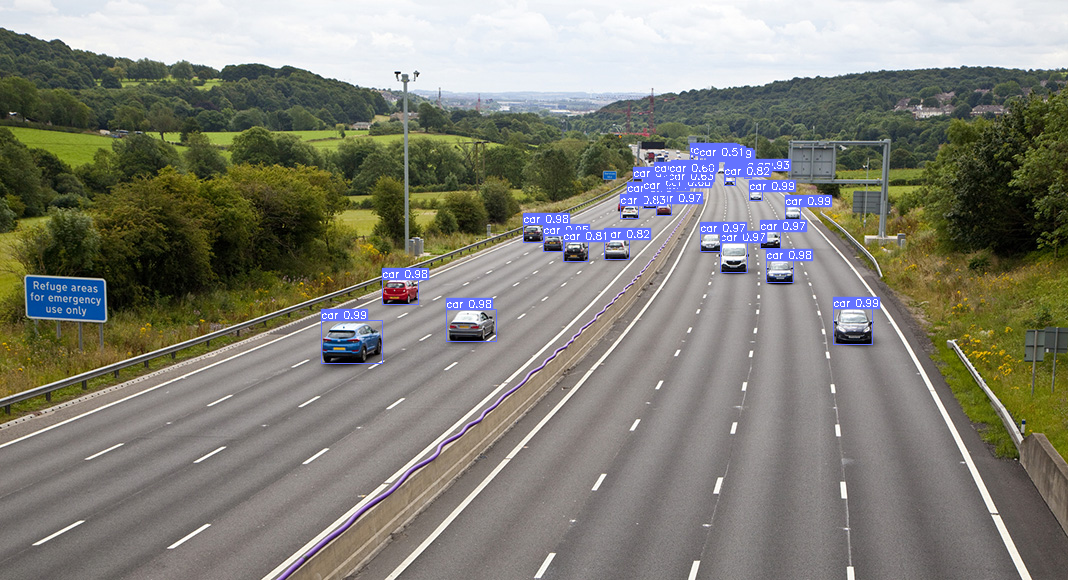

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a Detectron2 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 15 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

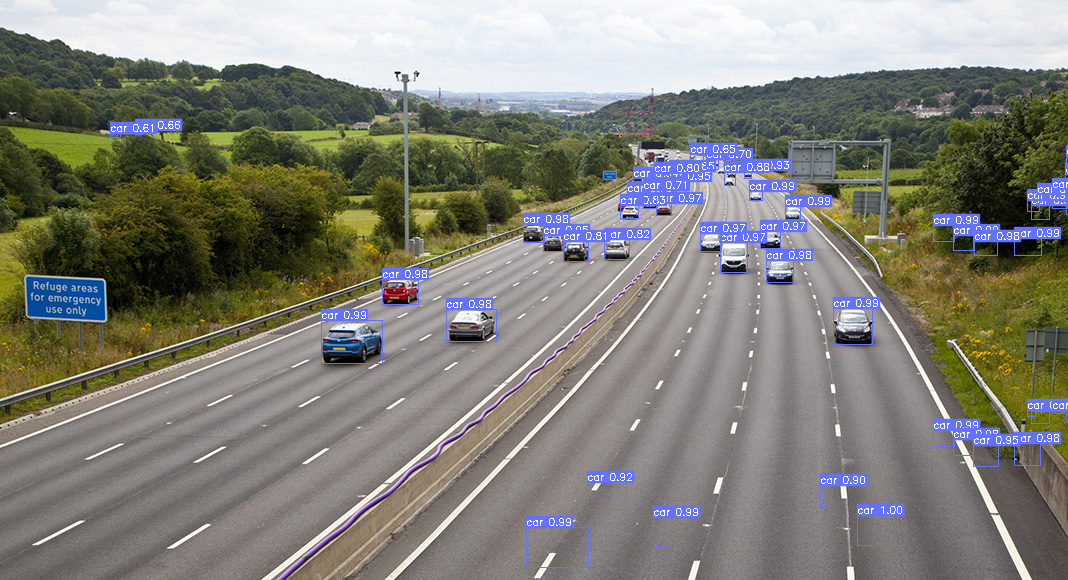

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
result.to_coco_annotations()[:3]

[{'area': 1440,
  'bbox': [857, 515, 48, 30],
  'category_id': 3,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.9988371729850769,
  'segmentation': []},
 {'area': 1258,
  'bbox': [1447, 514, 37, 34],
  'category_id': 3,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.9967244267463684,
  'segmentation': []},
 {'area': 644,
  'bbox': [1380, 465, 28, 23],
  'category_id': 3,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.996505618095398,
  'segmentation': []}]

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

[{'area': 1440,
  'bbox': [857, 515, 48, 30],
  'category_id': 3,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.9988371729850769,
  'segmentation': []},
 {'area': 1258,
  'bbox': [1447, 514, 37, 34],
  'category_id': 3,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.9967244267463684,
  'segmentation': []},
 {'area': 644,
  'bbox': [1380, 465, 28, 23],
  'category_id': 3,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.996505618095398,
  'segmentation': []}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
!pip install -U imantics

  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16033 sha256=8da50d8eb43867a43d4c12bdda7c7d3e6027d3728faf858cca30fd08cd2d27de
  Stored in directory: /root/.cache/pip/wheels/da/7c/3e/296fe3ed4eb3bd713e91dee0d0549f12f316d49939a64bdc96
Successfully built imantics


In [ ]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [ ]:
model_type = "torchvision"
model_path = model_path
model_config_path = model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.5

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [27]:
predict(
    model_type=model_type,
    model_path=TorchVisionTestConstants.FASTERCNN_MODEL_PATH,
    model_config_path=TorchVisionTestConstants.FASTERCNN_CONFIG_ZOO_NAME,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [01:29<02:58, 89.46s/it]

Performing prediction on 20 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [03:14<01:38, 98.84s/it]

Performing prediction on 15 number of slices.


Performing inference on images: 100%|██████████| 3/3 [04:36<00:00, 92.14s/it]
